# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [36]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import seaborn as sns
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
import numpy as np
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [37]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [38]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

- Dari hasil output df.info(), kita dapat melihat bahwa dataset ini terdiri atas 2537 baris dan 16 kolom.
- Semua kolom memiliki nilai non-null, artinya tidak ada missing values yang perlu ditangani. Dataset ini siap untuk dianalisis lebih lanjut.

In [40]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


1. TransactionAmount
- Rata-rata jumlah transaksi sebesar 297.65
- Memiliki variasi cukup tinggi, artinya ada transaksi kecil sekali dan ada juga transaksi besar.

2. CustomerAge
- Usia pelanggan berkisar antara 18 - 80 tahun dengan rata-rata 44.67 tahun.

3. TransactionDuration
- Durasi transaksi berkisar antara 10 hingga 300 detik dengan rata-rata 119.42 detik.

4. LoginAttempts
Percobaan login berkisar antara 1 hingga 5 kali dengan rata-rata 1.12.

5. AccountBalance
Saldo pengguna berkisar antara 101.25 hingga 14977.99 dengan rata-rata sebesar 5113.44.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

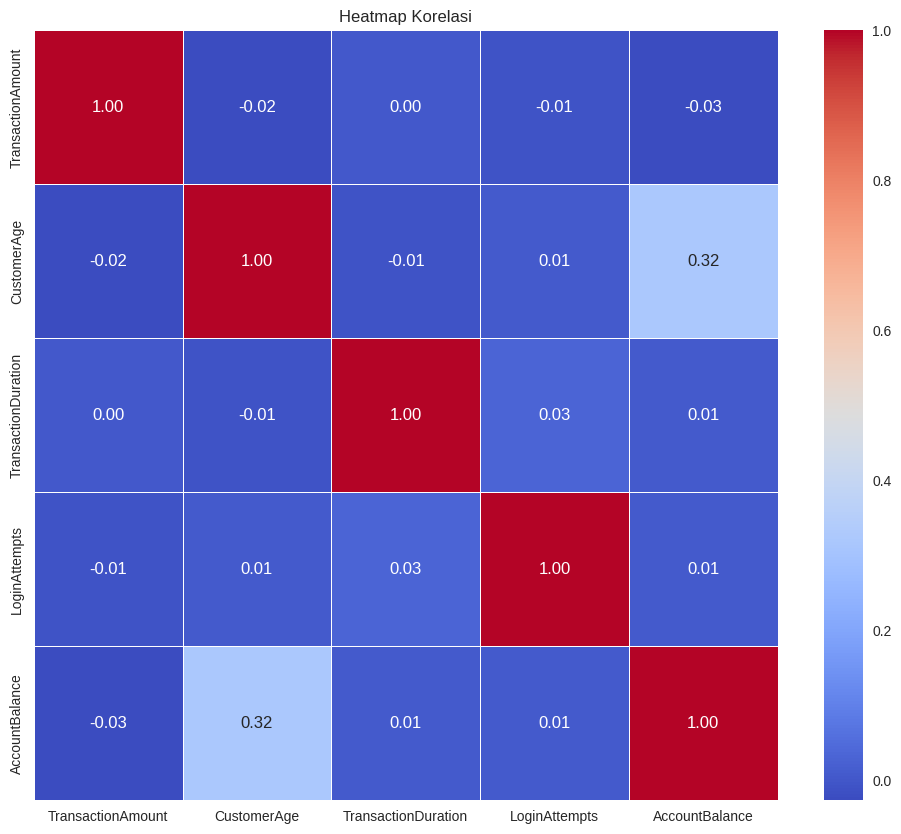

In [41]:
# Menampilkan korelasi antar fitur
# Heatmap korelasi untuk fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

1. Hubungan CustomerAge dengan AccountBalance (0.32)
- Korelasi positif sedang, artinya semakin tua usia pelanggan, cenderung memiliki saldo akun yang lebih besar. Hal ini karena orang lebih tua biasanya sudah lebih mapan secara finansial.

2. Hubungan antar variabel lain sangat lemah (mendekati 0)
- TransactionAmount dengan semua variabel hampir tidak berkorelasi (−0.03 s/d 0.00).
- TransactionDuration dengan variabel lain juga hampir tidak ada hubungan (maks 0.03).
- LoginAttempts tidak berkorelasi signifikan dengan variabel numerik lainnya (maks 0.03).

3. Tidak ada korelasi negatif kuat
Semua nilai korelasi mendekati 0, hanya ada sedikit negatif lemah, misalnya TransactionAmount dengan AccountBalance (−0.03).

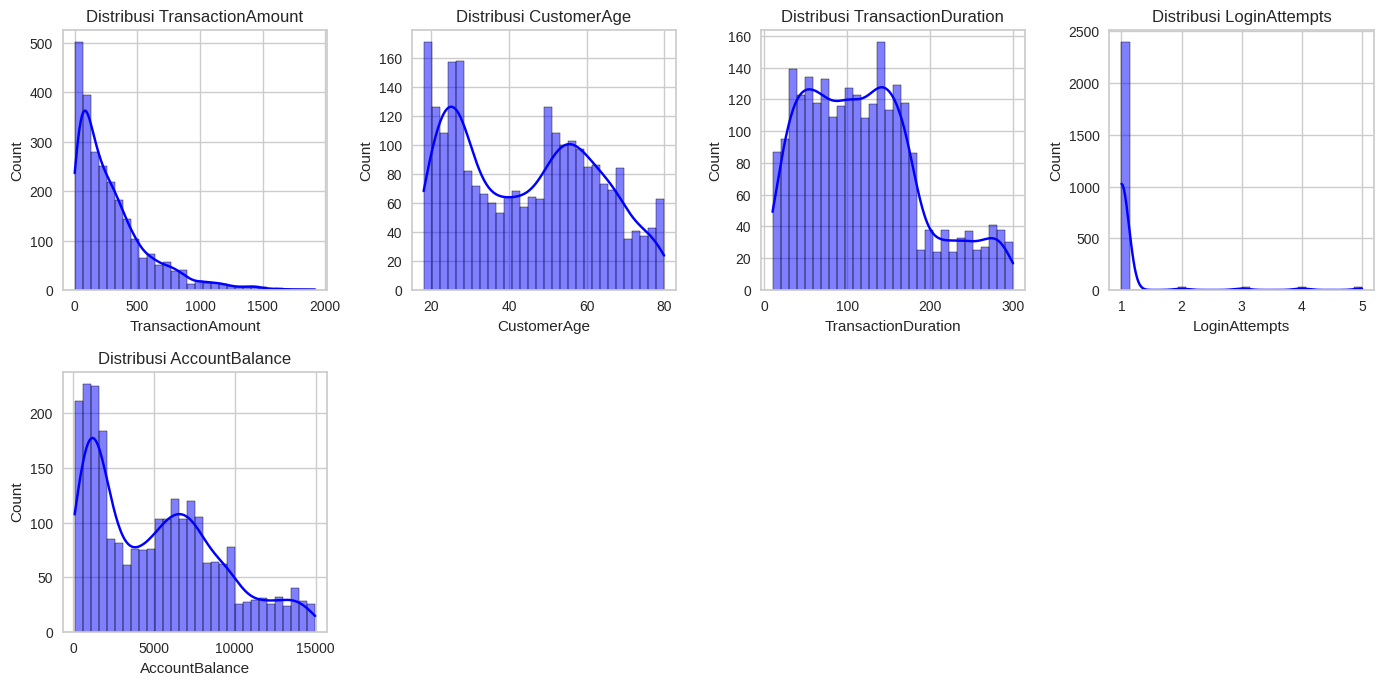

In [42]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

1. Distribusi TransactionAmount
- Distribusi sangat right-skewed (condong ke kanan).
- Mayoritas transaksi berada di bawah 500, dengan jumlah kecil mencapai lebih dari 1500.

2. Distribusi CustomerAge
- Usia pelanggan relatif beragam dari 18–80 tahun.
- Distribusi menunjukkan dua puncak (bimodal distribution) sekitar usia 25–30 tahun dan 55–60 tahun yang menandakan ada dua kelompok besar pengguna: usia muda produktif dan usia menjelang pensiun.

3. Distribusi TransactionDuration
- Distribusi mendekati normal, tapi sedikit condong ke kanan.
- Puncak ada di sekitar 100–150 detik, lalu menurun setelah itu.

4. Distribusi LoginAttempts
- Hampir semua pelanggan hanya butuh 1 kali percobaan login.
- Ada sedikit kasus dengan lebih dari 1 percobaan (hingga 5).

5. Distribusi AccountBalance
- Distribusi right-skewed dengan beberapa puncak.
- Ada kelompok saldo rendah (sekitar <2000), kelompok menengah (sekitar 5000–8000), dan kelompok tinggi (>12000).

/tmp/ipython-input-3031385935.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-3031385935.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-3031385935.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-3031385935.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-3031385935.py:9: FutureWarning: 

Pas

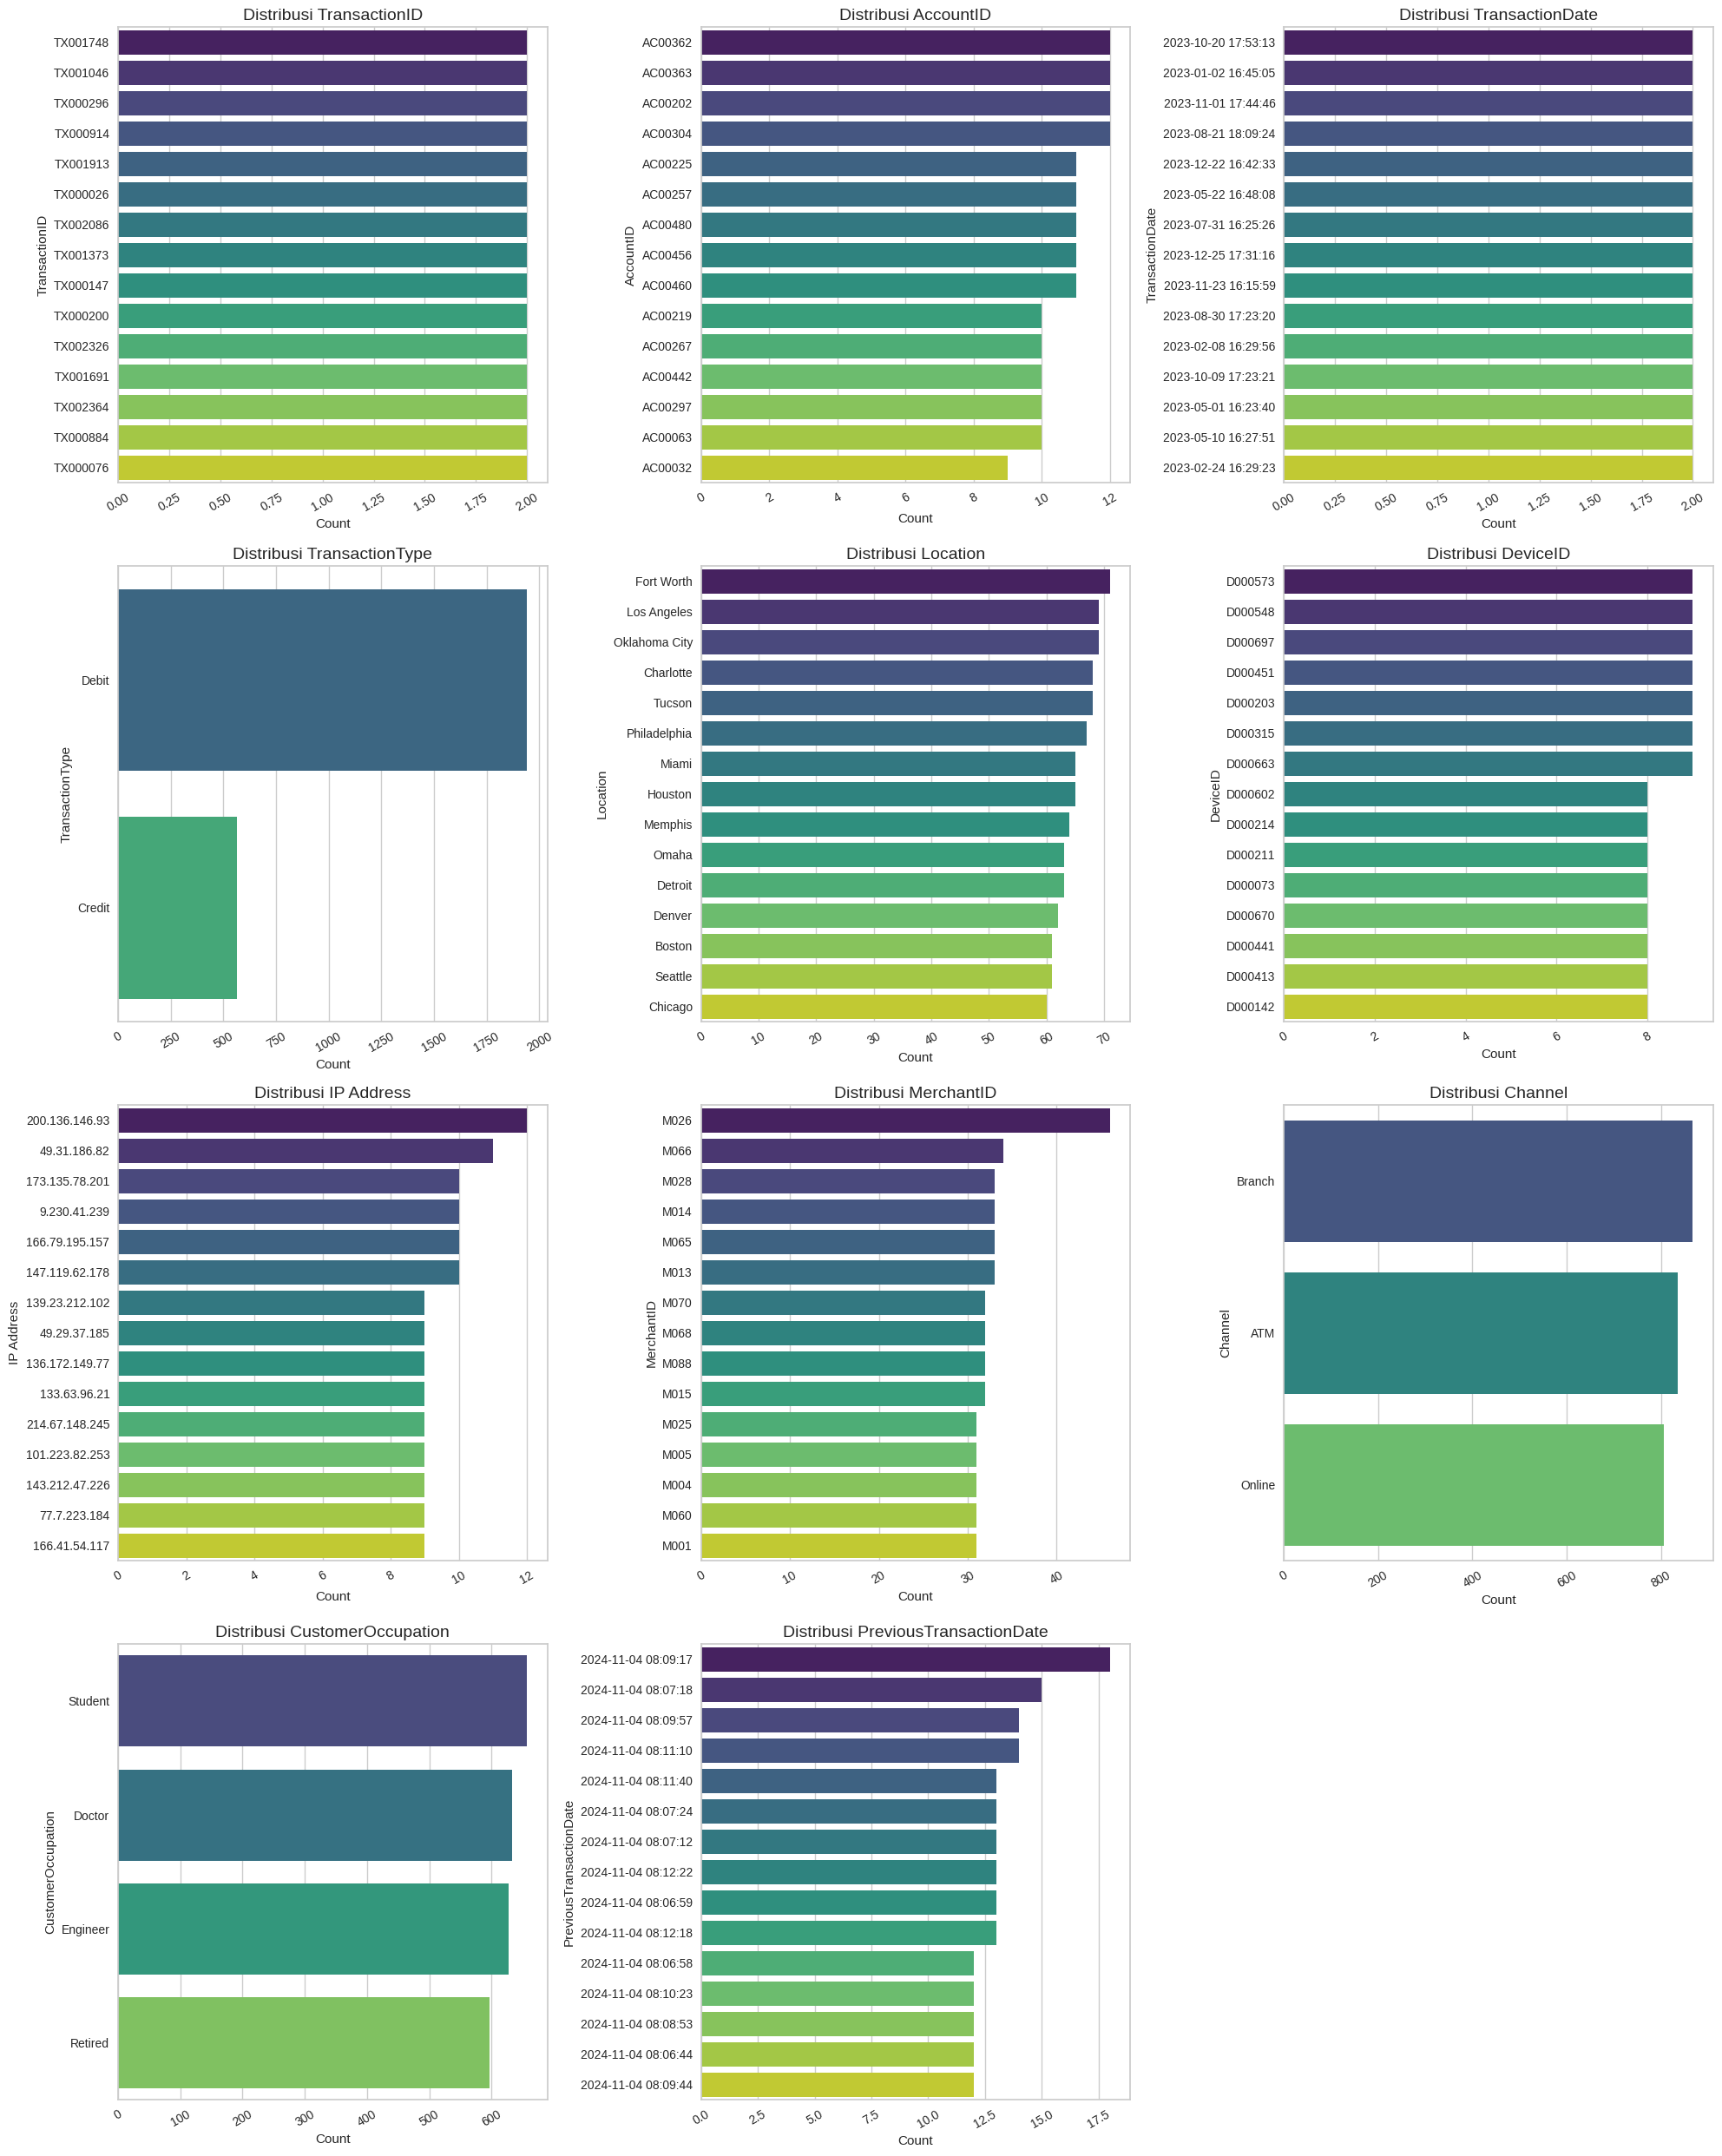

In [43]:
cat_features = df.select_dtypes(include=[object])

plt.figure(figsize=(20, 25))  # ukuran lebih besar
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(4, 3, i)  # grid 4x3 agar lebih lega

    # tampilkan hanya 15 kategori teratas
    top_categories = df[column].value_counts().nlargest(15).index
    sns.countplot(
        y=df[column],
        order=top_categories,
        palette='viridis'
    )

    plt.title(f'Distribusi {column}', fontsize=14)
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.xticks(rotation=30)  # rotasi agar lebih terbaca

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [44]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [45]:
df.isna().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [46]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  21


In [47]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [48]:
df.drop(['TransactionID', 'AccountID', 'DeviceID',  'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate'], axis=1, inplace=True)

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198
4,0.006874,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591


In [49]:
# Transformasi variabel kategorik dengan Label Encoding

# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = df.select_dtypes(include=[object])

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591


In [50]:
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [51]:
df_clean = df.dropna(how="any")
df_clean = df_clean.reset_index(drop=True)

In [52]:
df_clean.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [53]:
import numpy as np

def handle_outliers_all(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    print(f"Fitur numerik yang dicek: {list(numeric_cols)}\n")

    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Jumlah outlier pada {column}: {len(outliers)}")

        if len(outliers) > len(df) * 0.05:  # jika lebih dari 5% data, isi dengan median
            median_val = df[column].median()
            df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                                  median_val, df[column])
            print(f" → Outlier pada {column} diganti dengan median ({median_val})")
        else:  # jika sedikit, drop barisnya
            df.drop(outliers.index, inplace=True)
            print(f" → Outlier pada {column} di-drop")

    return df

# Jalankan untuk semua kolom numerik
df_clean = handle_outliers_all(df_clean)

Fitur numerik yang dicek: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

Jumlah outlier pada TransactionAmount: 106
 → Outlier pada TransactionAmount di-drop
Jumlah outlier pada TransactionType: 545
 → Outlier pada TransactionType diganti dengan median (1.0)
Jumlah outlier pada Location: 0
 → Outlier pada Location di-drop
Jumlah outlier pada Channel: 0
 → Outlier pada Channel di-drop
Jumlah outlier pada CustomerAge: 0
 → Outlier pada CustomerAge di-drop
Jumlah outlier pada CustomerOccupation: 0
 → Outlier pada CustomerOccupation di-drop
Jumlah outlier pada TransactionDuration: 0
 → Outlier pada TransactionDuration di-drop
Jumlah outlier pada LoginAttempts: 109
 → Outlier pada LoginAttempts di-drop
Jumlah outlier pada AccountBalance: 0
 → Outlier pada AccountBalance di-drop


In [54]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [55]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

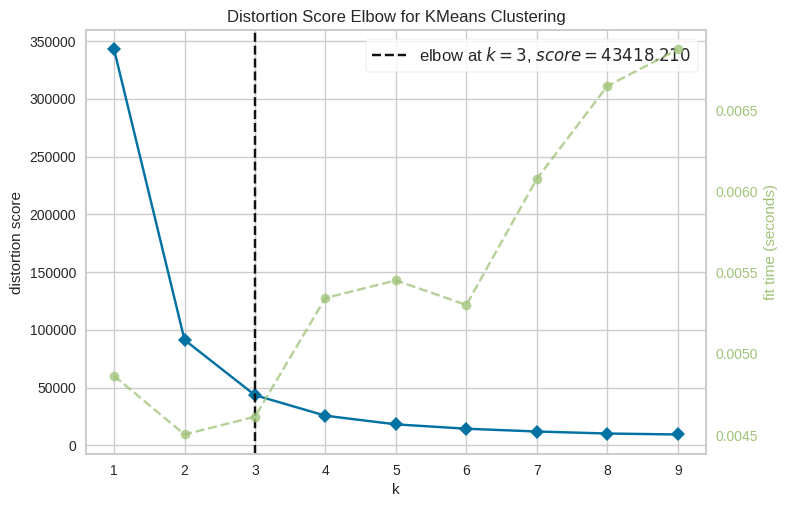

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
X = df_clean.values

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

k yang terbaik adalah 3

In [57]:
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k, feature_names):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        print(f"\nCluster {cluster_id + 1}:")
        # Menghitung rata-rata untuk semua fitur numerik
        for i, feature in enumerate(feature_names):
            mean_val = cluster_data[:, i].mean()
            print(f"Rata-rata {feature}: {mean_val:.2f}")

# Ambil semua variabel numerik
X = df_clean.select_dtypes(include=['int64', 'float64']).values
feature_names = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k, feature_names)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 0.14
Rata-rata TransactionType: 1.00
Rata-rata Location: 21.56
Rata-rata Channel: 1.03
Rata-rata CustomerAge: 0.44
Rata-rata CustomerOccupation: 1.53
Rata-rata TransactionDuration: 0.38
Rata-rata LoginAttempts: 0.00
Rata-rata AccountBalance: 0.34

Cluster 2:
Rata-rata TransactionAmount: 0.13
Rata-rata TransactionType: 1.00
Rata-rata Location: 35.82
Rata-rata Channel: 1.01
Rata-rata CustomerAge: 0.41
Rata-rata CustomerOccupation: 1.53
Rata-rata TransactionDuration: 0.37
Rata-rata LoginAttempts: 0.00
Rata-rata AccountBalance: 0.33

Cluster 3:
Rata-rata TransactionAmount: 0.13
Rata-rata TransactionType: 1.00
Rata-rata Location: 7.15
Rata-rata Channel: 1.00
Rata-rata CustomerAge: 0.43
Rata-rata CustomerOccupation: 1.54
Rata-rata TransactionDuration: 0.38
Rata-rata LoginAttempts: 0.00
Rata-rata AccountBalance: 0.34


Jalankan cell code ini untuk menyimpan model kamu.

In [58]:
# Simpan model dengan nama file "model_clustering.pkl"
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [59]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
sil_score = silhouette_score(X, labels)

print("Silhouette Score:", sil_score)

Silhouette Score: 0.5467896672526016


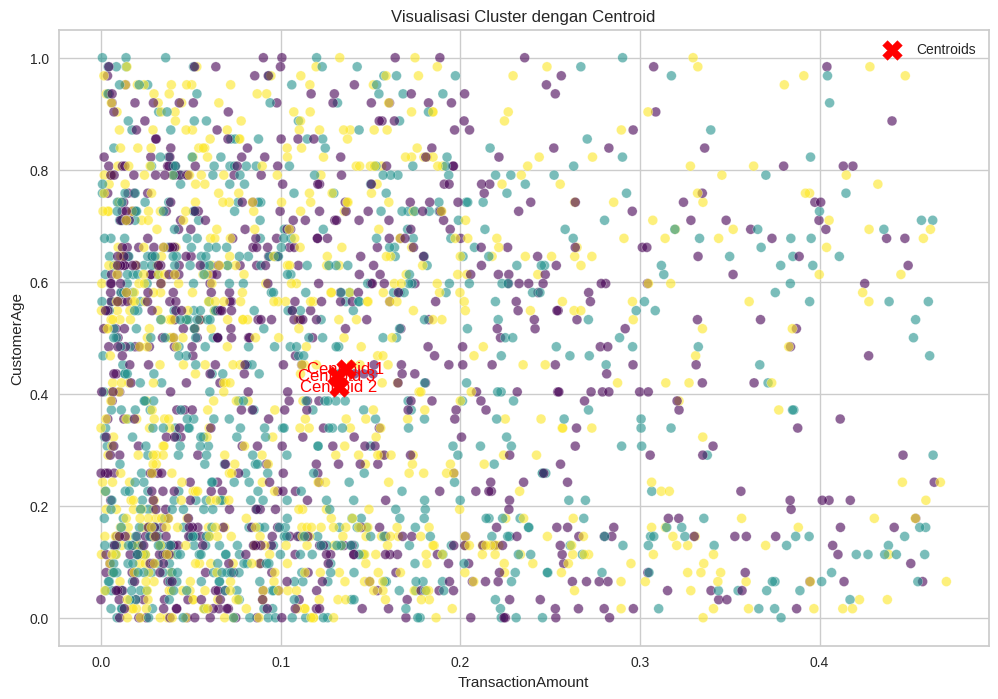

Nilai Centroids:

Centroid 1:
  TransactionAmount = 0.14
  TransactionType = 1.00
  Location = 21.56
  Channel = 1.03
  CustomerAge = 0.44
  CustomerOccupation = 1.53
  TransactionDuration = 0.38
  LoginAttempts = 0.00
  AccountBalance = 0.34

Centroid 2:
  TransactionAmount = 0.13
  TransactionType = 1.00
  Location = 35.82
  Channel = 1.01
  CustomerAge = 0.41
  CustomerOccupation = 1.53
  TransactionDuration = 0.37
  LoginAttempts = 0.00
  AccountBalance = 0.33

Centroid 3:
  TransactionAmount = 0.13
  TransactionType = 1.00
  Location = 7.15
  Channel = 1.00
  CustomerAge = 0.43
  CustomerOccupation = 1.54
  TransactionDuration = 0.38
  LoginAttempts = 0.00
  AccountBalance = 0.34


In [60]:
import matplotlib.pyplot as plt

# Ambil nama fitur numerik
feature_names = df.select_dtypes(include=['int64', 'float64']).columns

# Pilih 2 fitur untuk visualisasi (misalnya Annual Income & Spending Score)
x_idx, y_idx = 0, 4   # ubah indeks sesuai kebutuhan
x_feature, y_feature = feature_names[x_idx], feature_names[y_idx]

# Posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(
    X[:, x_idx], X[:, y_idx],
    c=labels, cmap='viridis', s=50, alpha=0.6,
    edgecolors='w', marker='o'
)

# Plot centroid
plt.scatter(
    centroids[:, x_idx], centroids[:, y_idx],
    c='red', s=200, marker='X', label='Centroids'
)

# Tambahkan label centroid
for i, centroid in enumerate(centroids):
    plt.text(
        centroid[x_idx], centroid[y_idx],
        f'Centroid {i+1}', color='red',
        fontsize=12, ha='center', va='center'
    )

# Tambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()
plt.show()

# Tampilkan nilai centroid untuk semua fitur
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"\nCentroid {i+1}:")
    for j, feature in enumerate(feature_names):
        print(f"  {feature} = {centroid[j]:.2f}")


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [61]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

In [62]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. Cluster 1
TransactionAmount: 0.14 (rendah)
Location: 21.56 (cukup tinggi)
CustomerAge: 0.44 (usia relatif muda)
CustomerOccupation: 1.53
AccountBalance: 0.34 (rendah)
LoginAttempts & TransactionDuration: sangat rendah

Analisis:
Cluster ini merepresentasikan nasabah dengan saldo rendah, transaksi kecil, namun lokasi akses cukup tinggi. Bisa jadi kelompok ini adalah pengguna muda yang aktif secara geografis (mobilitas tinggi), tetapi belum memiliki saldo besar.
Rekomendasi: Tawarkan produk tabungan atau program loyalitas yang mendorong mereka meningkatkan saldo dan frekuensi transaksi.

2. Cluster 2
TransactionAmount: 0.13 (rendah, hampir sama dengan cluster lain)
Location: 35.82 (sangat tinggi)
CustomerAge: 0.41 (usia relatif muda)
CustomerOccupation: 1.53
AccountBalance: 0.33 (rendah)
LoginAttempts & TransactionDuration: sangat rendah

Analisis:
Cluster ini unik karena nasabah dengan mobilitas/lokasi paling tinggi dibandingkan cluster lain, tetapi saldo dan jumlah transaksi tetap rendah. Artinya, kelompok ini cenderung sering berpindah lokasi/akses (mungkin traveler atau pekerja lapangan), tapi tidak menyimpan banyak dana di rekening.
Rekomendasi: Tawarkan layanan mobile banking yang fleksibel, kartu debit internasional, atau promosi khusus untuk pengguna yang sering bepergian.

3. Cluster 3
TransactionAmount: 0.13 (rendah)
Location: 7.15 (terendah)
CustomerAge: 0.43 (usia muda, mirip cluster lain)
CustomerOccupation: 1.54
AccountBalance: 0.34 (rendah)
LoginAttempts & TransactionDuration: rendah

Analisis:
Cluster ini mencakup nasabah dengan mobilitas rendah (lokasi kecil), saldo rendah, dan transaksi kecil. Kemungkinan ini adalah nasabah pasif atau jarang melakukan transaksi di berbagai tempat.
Rekomendasi: Lakukan edukasi keuangan atau program promosi untuk meningkatkan aktivitas transaksi mereka (misalnya cashback untuk belanja atau transfer).

In [63]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [64]:
import pandas as pd

# Ambil data numerik hasil preprocessing
X_df = df_clean.copy()

# Tambahkan kolom hasil clustering
X_df["Target"] = labels   # labels berasal from KMeans

In [65]:
# Mengekspor ke CSV
X_df.to_csv("data_clustering.csv", index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [66]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [67]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [68]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [69]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [70]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.